<a href="https://colab.research.google.com/github/PaulChinta/study/blob/main/DM_PA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#only run this
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Kaggle/'

In [14]:
%cd '/content/drive/MyDrive/Kaggle/'

/content/drive/MyDrive/Kaggle


In [15]:
!kaggle datasets download -d samaneheslamifar/facial-emotion-expressions

 94% 113M/121M [00:01<00:00, 88.3MB/s]
100% 121M/121M [00:01<00:00, 84.2MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

In [18]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [70]:
import numpy as np

In [19]:
train_path='/content/drive/MyDrive/Kaggle/images/train'
validation_path='/content/drive/MyDrive/Kaggle/images/validation'


t=transforms.Compose([transforms.ToTensor()])

In [34]:
train_dataset=torchvision.datasets.ImageFolder(root=train_path,transform=t)
validation_dataset=torchvision.datasets.ImageFolder(root=validation_path,transform=t)
classes = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

In [113]:
def random4(dataset):
  return [dataset[np.random.randint(len(dataset))] for x in range(4)]

In [88]:
def display(image,label,classes):
  plt.figure(figsize=(9,9))
  plt.subplot(1,4,1)
  plt.imshow(image[0].permute(1, 2, 0))
  plt.title(classes[label[0]])
  plt.subplot(1,4,2)
  plt.imshow(image[1].permute(1, 2, 0))
  plt.title(classes[label[1]])
  plt.subplot(1,4,3)
  plt.imshow(image[2].permute(1, 2, 0))
  plt.title(classes[label[2]])
  plt.subplot(1,4,4)
  plt.imshow(image[3].permute(1, 2, 0))
  plt.title(classes[label[3]])

In [195]:
def lossgraph(list_loss):
  if isinstance(list_loss,tuple):
    for i in list_loss:
      x=range(len(i))
      y=i
      plt.plot(x,y,marker ='.')
      plt.legend(["train loss", "test loss"])
  else:
    x=range(len(list_loss))
    y=list_loss
    plt.plot(x,y,marker ='.')
    plt.show()
    plt.legend(["train loss", "test loss"])

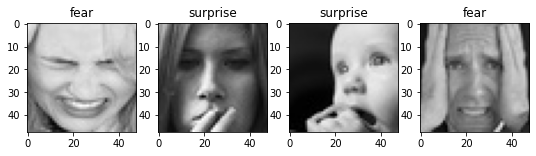

In [117]:
b=random4(validation_dataset)
image=[b[x][0] for x in range(len(b))]
label=[b[x][1]for x in range(len(b))]
display(image,label,classes)

In [119]:
train_samples=len(train_dataset)
valid_samples=len(validation_dataset)
print("samples in train set : "+str(train_samples))
print("samples in validation set : "+str(valid_samples))
print("total samples : "+str(train_samples+valid_samples))

samples in train set : 28821
samples in validation set : 7066
total samples : 35887


In [122]:
#create network class which takes layers

In [211]:
import torch.nn as nn
import torch.nn.functional as F

#network architecture

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.conv2 = nn.Conv2d(16, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(16, 16, 3)
        self.conv4 = nn.Conv2d(16, 16, 3)
        self.fc1 = nn.Linear(1296, 50)
        self.fc2 = nn.Linear(50, 7)

    def forward(self, x):
        x =F.relu(self.conv1(x)) 
        x = F.relu(self.pool(self.conv2(x)))
        x =F.relu(self.conv3(x)) 
        x = F.relu(self.pool(self.conv4(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()

In [206]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [209]:
batch_size=4
trainloader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(validation_dataset,batch_size=batch_size,shuffle=True)

In [212]:
# train
for epoch in range(2):  # loop over the dataset multiple times
    train_loss=[]
    test_loss=[]
    it = iter(testloader)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
      
        if i % 500 == 499:    # print every 2000 mini-batches
            l=running_loss / 500
            train_loss.append(l)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {l:.3f}')
            running_loss = 0.0

            # input,label=testloader
            
            data = next(it)
            input=data[0]
            labels=data[1]
            out=net(input)
            loss = criterion(out, labels)
            test_loss.append(loss.item())

print('Finished Training')

[1,   500] loss: 1.926
[1,  1000] loss: 1.925
[1,  1500] loss: 1.927
[1,  2000] loss: 1.926
[1,  2500] loss: 1.926
[1,  3000] loss: 1.926
[1,  3500] loss: 1.925
[1,  4000] loss: 1.925
[1,  4500] loss: 1.925
[1,  5000] loss: 1.925
[1,  5500] loss: 1.925
[1,  6000] loss: 1.925
[1,  6500] loss: 1.926
[1,  7000] loss: 1.926
[2,   500] loss: 1.926
[2,  1000] loss: 1.926
[2,  1500] loss: 1.925
[2,  2000] loss: 1.926
[2,  2500] loss: 1.925
[2,  3000] loss: 1.925
[2,  3500] loss: 1.927
[2,  4000] loss: 1.925
[2,  4500] loss: 1.925
[2,  5000] loss: 1.925
[2,  5500] loss: 1.926
[2,  6000] loss: 1.925
[2,  6500] loss: 1.926
[2,  7000] loss: 1.925
Finished Training


In [203]:
test_loss

[1.7971433401107788,
 1.6405699253082275,
 1.4729111194610596,
 1.7989859580993652,
 1.6982945203781128,
 1.6877977848052979,
 1.7205554246902466,
 1.7250909805297852,
 1.7564244270324707,
 1.8133196830749512,
 1.963386058807373,
 1.5598045587539673,
 1.501670479774475,
 1.9587972164154053]

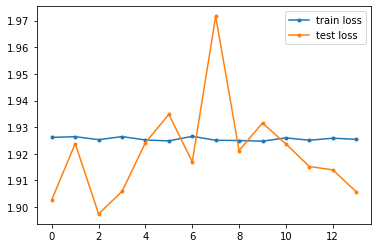

In [213]:
lossgraph((train_loss,test_loss))

In [140]:
 #tester
for epoch in range(2):  # loop over the dataset multiple times
    test_loss=[]
    running_loss2 = 0.0
    for j, testdata in enumerate(testloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        test_inputs, test_labels = testdata
        # forward + backward + optimize
        test_outputs = net(test_inputs)
        test_loss = criterion(test_outputs, test_labels)

        # print statistics
        running_loss2 += test_loss.item()
      
        if j % 500 == 499:    # print every 2000 mini-batches
            l2=running_loss2 / 500
            test_loss.append(l2)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {l2:.3f}')
            running_loss2 = 0.0

print('Finished Training')